In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Agregar este archivo a la carpeta de google drive clickeando en el link y clickeando el '+' arriba a la derecha

https://drive.google.com/open?id=1jJ20oNZIysi-V-iORAE0eEZq4LhuWxUW

In [ ]:
import codecs
import numpy as np

In [ ]:
# ! wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
# ! unzip glove.6B.zip

In [ ]:
EMBEDDING_DIR = "/content/drive/My Drive/Datasets/Glove/"
# EMBEDDING_DIR = "./"


In [ ]:
def load_embeddings(file, embed_dim=100):
  #load embeddings

  print('loading word embeddings...')
  embeddings_index = {}
  f = codecs.open(EMBEDDING_DIR+'glove.6B.100d.txt', encoding='utf-8')
  for line in f:
      values = line.rstrip().rsplit(' ')
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  print('found %s word vectors' % len(embeddings_index))
  return embeddings_index

In [ ]:
# embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.300d.txt', embed_dim=300)
embeddings_index = load_embeddings(EMBEDDING_DIR+'glove.6B.100d.txt')

loading word embeddings...
found 400000 word vectors


embeddings_index es un diccionario que tiene las palabras (400 mil) y el vector de embeddin de tamaño 100 para cada palabra. el vector de embedding muestra las 100 mas relacioanadas.
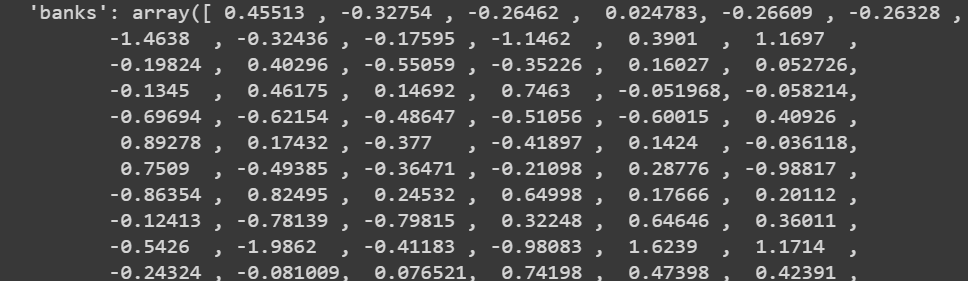

In [ ]:
# Armar matriz de embedigs de 400000x100
matrix_word_vectors =  np.array(list(embeddings_index.values())) # Se puede armar en una linea haciendo un cast a np.array y un .values del dict
# Aramr lista con vocabilario
vocab_list = list(embeddings_index.keys()) # Se puede armar con una linea .keys del dict

In [ ]:
matrix_word_vectors.shape

(400000, 100)

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Entrenar un modelo de Nearest neighbours con los 20 primeros y distancia coseno

In [ ]:
nearest = NearestNeighbors(n_neighbors=20,metric='cosine')

In [ ]:
# Entrenar modelo
nearest.fit(matrix_word_vectors)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [ ]:
def get_analogy(word1, word2, word3, embeddings_index=embeddings_index):
  # word1 es a word2 como word3 es a word4
  # Tiene que devolver word4
    embed_word = -embeddings_index[word1] + embeddings_index[word2] + embeddings_index[word3]
    distances, nearest_indexes = nearest.kneighbors(embed_word.reshape(1, -1))
    nearest_words = [vocab_list[i] for i in nearest_indexes[0]]
    if word1 in nearest_words: nearest_words.remove(word1)
    if word2 in nearest_words: nearest_words.remove(word2)
    if word3 in nearest_words: nearest_words.remove(word3)
    return nearest_words

In [ ]:
def get_nearests_words(vector, nearest=nearest):
  # Dado un vector, tiene que devolver la lista de los 20 mas cercanos
  distances, nearest_indexes = nearest.kneighbors(vector.reshape(1, -1))
  words_list = [vocab_list[i] for i in nearest_indexes[0]] 
  return words_list

In [ ]:
# Probar las siguientes analogías
#
# woman -> man, queen -> ?
# england -> london, france-> ?
# woman -> women, man -> ?
# messi -> soccer, federer -> ?
# switzerland -> alps, argentina ->

#analogy_vector = get_analogy('woman','man','queen') #, 'switzerland', 'alps', 'argentina'
analogy_vector = get_analogy('messi','soccer','federer') 

In [ ]:
analogy_vector

['sannio',
 'descubrimiento',
 'poble',
 'signo',
 'organismo',
 'yaque',
 'observador',
 'coloso',
 'boletín',
 'lenguaje',
 'crimen',
 'golfo',
 'pital',
 'monopolio',
 'comunismo',
 'góry',
 'asociado',
 'olona',
 'pepino']

In [ ]:
# Probar función get_nearests_words -> Devuelve las palabras mas cercanas. Se pueden combinar
get_nearests_words(embeddings_index['messi'] + embeddings_index['federer'])

#O de a una.

get_nearests_words(embeddings_index['messi'] )

['messi',
 'ronaldinho',
 "eto'o",
 'iniesta',
 'saviola',
 'ronaldo',
 'xavi',
 'tevez',
 'zidane',
 'figo',
 'rivaldo',
 'benzema',
 'robinho',
 'fabregas',
 'zinedine',
 'higuain',
 'romario',
 'anelka',
 'riquelme',
 'ibrahimovic']

In [ ]:
#ejemplo español.
get_nearests_words(embeddings_index['pelicula'] )

['pelicula',
 'actriz',
 'situacion',
 'personaje',
 'filme',
 'actuacion',
 'fue',
 'recuerda',
 'importante',
 'trata',
 'manera',
 'realmente',
 'esta',
 'mejor',
 'programa',
 'experiencia',
 'cual',
 'filmacion',
 'anade',
 'calidad']

In [ ]:
animals = ['dog',
 'cat',
 'dogs',
 'pet',
 'puppy',
 'horse',
 'animal',
 'pig',
 'boy',
 'cats',
 'rabbit',
 'goat',
 'sled',
 'monkey',
 'cow',
 'rat',
 'breed',
 'mad',
 'hound',
 'bird']

In [ ]:
transport = ['car',
 'vehicle',
 'truck',
 'cars',
 'driver',
 'driving',
 'motorcycle',
 'vehicles',
 'parked',
 'bus',
 'taxi',
 'suv',
 'pickup',
 'jeep',
 'mercedes',
 'cab',
 'bicycle',
 'drivers',
 'automobile',
 'train']

In [ ]:
countries = ['argentina',
 'england',
 'australia',
 'spain',
 'brazil',
 'portugal',
 'zealand',
 'scotland',
 'match',
 'africa',
 'wales',
 'ireland',
 'italy',
 'matches',
 'france',
 'indies',
 'uruguay',
 'britain',
 'netherlands',
 'united']

In [ ]:
professions = ['engineer',
 'scientist',
 'economist',
 'professor',
 'consultant',
 'director',
 'dr.',
 'doctor',
 'researcher',
 'expert',
 'physician',
 'officer',
 'surgeon',
 'chief',
 'assistant',
 'specialist',
 'associate',
 'author',
 'worked',
 'psychologist']

In [ ]:
all_words = animals + transport + countries + professions

In [ ]:
vectors_subset = np.array([embeddings_index[word] for word in all_words])

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(2, verbose=1)

In [ ]:
%time embed_2d_tsne = tsne.fit_transform(vectors_subset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 3.172693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.458420
[t-SNE] KL divergence after 1000 iterations: 0.211547
CPU times: user 949 ms, sys: 75.2 ms, total: 1.02 s
Wall time: 547 ms


In [ ]:
from matplotlib import pyplot as plt

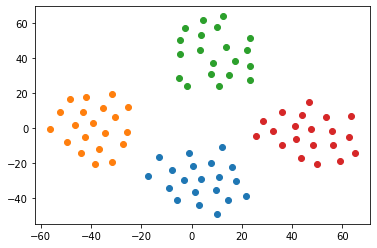

In [ ]:
for i in range(4):
  plt.scatter(embed_2d_tsne[i*20:(i+1)*20,0], embed_2d_tsne[i*20:(i+1)*20,1], c=f'C{i}')

